In [5]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install nltk
!pip install vaderSentiment
!pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.3 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2


In [2]:
!python -m spacy validate

✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.5.1) =================
ℹ spaCy installation:
/Users/sandrobarreshamers/opt/anaconda3/envs/KRW/lib/python3.8/site-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_sm   >=3.5.0,<3.6.0   3.5.0   ✔



In [16]:
# Import libraries 

#basic libraries
import pandas as pd 
import numpy
import os
#Spacy libraries
import spacy
from spacy.lang.en import English
from spacy.matcher import Matcher, PhraseMatcher
from spacy.tokens import Doc, Span
from spacy.language import Language

#NLTK libraries for sentiment analysis VADER
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Visiualization and ML libraries
import sklearn
import matplotlib


In [17]:
cwd = os.getcwd()  
files = os.listdir(cwd)

print("Files in %r: %s" % (cwd, files))

Files in '/Users/sandrobarreshamers/github/krweb/Python files': ['.ipynb_checkpoints', 'Analysis.ipynb']


In [26]:
time_line = pd.read_csv('/Users/sandrobarreshamers/github/krweb/Query_files/time_line_BBC.csv')
print(time_line)
time_line.columns.values



                          event             datetime  \
0    http://example.com/E_BBC_1  2021-01-06T08:17:00   
1    http://example.com/E_BBC_2  2021-01-06T10:58:00   
2    http://example.com/E_BBC_3  2021-01-06T12:00:00   
3    http://example.com/E_BBC_4  2021-01-06T12:53:00   
4    http://example.com/E_BBC_5  2021-01-06T13:10:00   
5    http://example.com/E_BBC_6  2021-01-06T13:45:00   
6    http://example.com/E_BBC_7  2021-01-06T14:13:00   
7    http://example.com/E_BBC_7  2021-01-06T14:13:00   
8    http://example.com/E_BBC_8  2021-01-06T14:24:00   
9    http://example.com/E_BBC_9  2021-01-06T14:26:00   
10  http://example.com/E_BBC_10  2021-01-06T14:41:00   
11  http://example.com/E_BBC_10  2021-01-06T14:41:00   
12  http://example.com/E_BBC_11  2021-01-06T15:13:00   
13  http://example.com/E_BBC_12  2021-01-06T16:17:00   
14  http://example.com/E_BBC_12  2021-01-06T16:17:00   
15  http://example.com/E_BBC_12  2021-01-06T18:00:00   
16  http://example.com/E_BBC_12  2021-01-06T18:0

array(['event', 'datetime', 'location', 'description'], dtype=object)

In [ ]:
# Load the medium English model
nlp = spacy.load('en_core_web_sm')

nltk.download('vader_lexicon')

def VADER_score(text):
    #instanciate the analayzer
    analyzer = SentimentIntensityAnalyzer()
    
    # Process the sentence with Spacy
    doc = nlp(text)
    
    # Use VADER to analyze the sentiment of the sentence
    vader_scores = analyzer.polarity_scores(text)
    
    return vader_scores



In [ ]:
# This fucntion calls all the pipe line elements and computes the different scores
def process_text(text):
    # Process the text with the NLP pipeline
    doc = nlp(text)
    # Compute VADER scores
    vader_scores = VADER_score(text)
    
    #save different VADER scores sperately
    vader_neg = vader_scores['neg']
    vader_neu = vader_scores['neu']
    vader_pos = vader_scores['pos']
    vader_compound = vader_scores['compound']
    
    return  vader_neg, vader_neu, vader_pos, vader_compound


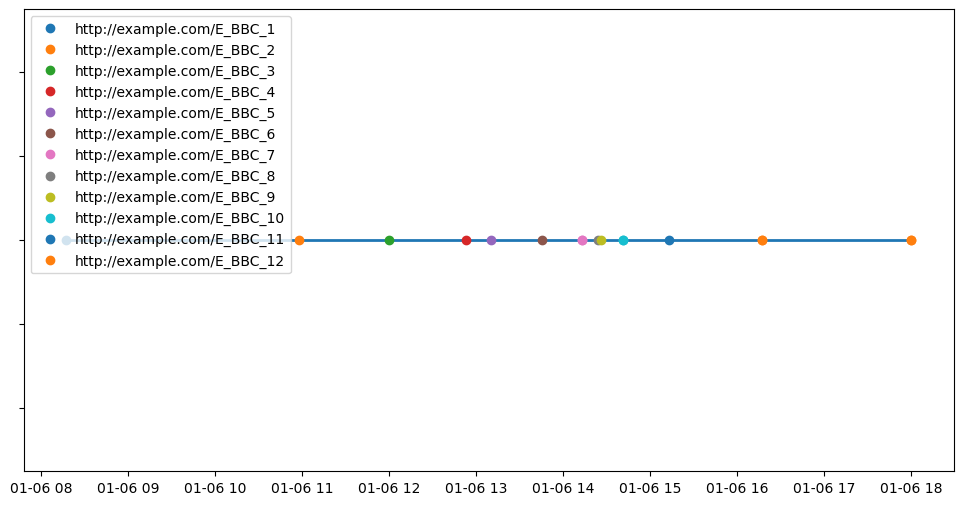

In [28]:
# convert the datetime column to a datetime object
time_line['datetime'] = pd.to_datetime(time_line['datetime'], format='%Y-%m-%dT%H:%M:%S')

# create a plot with a horizontal line for the timeline
fig, ax = plt.subplots(figsize=(12, 6))
ax.hlines(y=1, xmin=time_line['datetime'].min(), xmax=time_line['datetime'].max(), linewidth=2)

# plot a dot for each event at the corresponding datetime
for i, event in enumerate(time_line['event'].unique()):
    event_df = time_line[time_line['event'] == event]
    ax.plot(event_df['datetime'], [1] * len(event_df), 'o', color='C{}'.format(i), label=event)

# set the y-axis tick labels to an empty list to remove the y-axis label
ax.set_yticklabels([])

# add a legend and show the plot
ax.legend()
plt.show()